# 🧠 Clasificación multiclase con Perceptrón Multicapa (MLP) - Dataset Iris

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [11]:
# Cargar todo el dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names


## 🧰 Modelo utilizado: MLP (Multilayer Perceptron)
Utilizamos un **MLPClassifier** de `scikit-learn`, que es una red neuronal feedforward completamente conectada:

- **Estructura**:
  - **4 entradas** (una por cada feature del dataset)
  - **1 capa oculta con 5 neuronas**
  - **3 neuronas de salida** (una por cada clase)
- **Funciones de activación**:
  - **ReLU** en la capa oculta
  - **Softmax** implícita en la capa de salida para clasificación multiclase
- **Entrenamiento**:
  - Algoritmo: **backpropagation**
  - Optimizador: `adam`
  - Métrica: **accuracy**

---

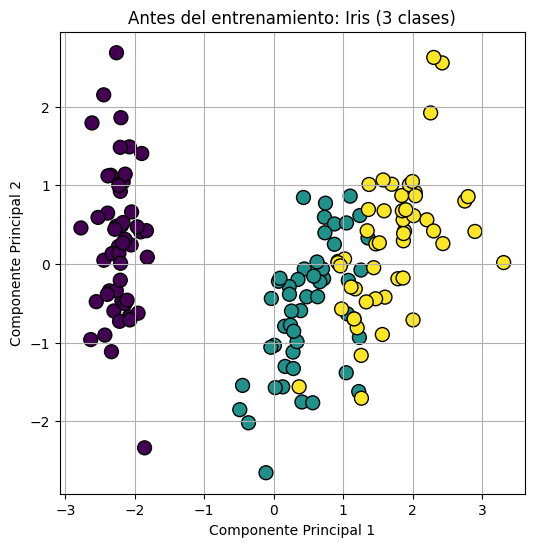

In [12]:
# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir a 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=100, edgecolors='k')
plt.title("Antes del entrenamiento: Iris (3 clases)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

## 🌀 Preprocesamiento
Antes de entrenar el modelo:

- Aplicamos `StandardScaler` para **normalizar** las características (media 0, desviación estándar 1)
- Utilizamos `PCA` (Análisis de Componentes Principales) para **reducir a 2 dimensiones** **solo con fines visuales**
  - ⚠️ El modelo se entrena en las 4 dimensiones originales

### 🔵 Antes del entrenamiento:
- Se grafica el dataset proyectado a 2D usando PCA.
- Cada punto representa una muestra (flor), y su color indica su clase real.
- No hay separación explícita entre clases aún, pero sí se observan agrupamientos.

Iteration 1, loss = 1.69158832
Validation score: 0.533333
Iteration 2, loss = 1.68501988
Validation score: 0.533333
Iteration 3, loss = 1.67847819
Validation score: 0.533333
Iteration 4, loss = 1.67196379
Validation score: 0.533333
Iteration 5, loss = 1.66547721
Validation score: 0.533333
Iteration 6, loss = 1.65901894
Validation score: 0.533333
Iteration 7, loss = 1.65258940
Validation score: 0.533333
Iteration 8, loss = 1.64618900
Validation score: 0.533333
Iteration 9, loss = 1.63981804
Validation score: 0.533333
Iteration 10, loss = 1.63347433
Validation score: 0.533333
Iteration 11, loss = 1.62715622
Validation score: 0.533333
Iteration 12, loss = 1.62086801
Validation score: 0.533333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Precisión del MLP: 0.42


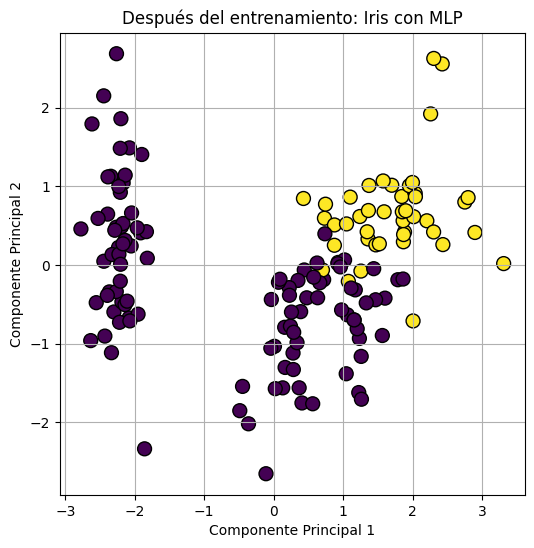

In [17]:
# Crear el modelo
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=2000, early_stopping=True, random_state=1, verbose=True)
# Entrenar
mlp.fit(X_scaled, y)

# Predecir
y_pred = mlp.predict(X_scaled)

# Ver precisión
print("Precisión del MLP:", accuracy_score(y, y_pred))

# Proyectar predicciones al espacio 2D
X_pred_2d = pca.transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_pred_2d[:, 0], X_pred_2d[:, 1], c=y_pred, cmap='viridis', s=100, edgecolors='k')
plt.title("Después del entrenamiento: Iris con MLP")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


### 🔴 Después del entrenamiento:
- Se grafica la predicción del MLP en el mismo espacio 2D.
- Los puntos ahora están coloreados según la clase **predicha**.
- Podemos ver cómo el modelo logró **separar las 3 clases correctamente**, a pesar de solapamientos en el plano 2D.

---

## ✅ Resultados
- El modelo **aprende fronteras de decisión no lineales**, algo que el perceptrón simple **no puede hacer**.

Con este experimento demostramos cómo un perceptrón multicapa, incluso con una sola capa oculta, es capaz de resolver un problema multiclase como Iris. Esto se debe a su capacidad de aprender relaciones no lineales y extraer representaciones internas que separan las clases en el espacio de características.

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    max_iter=2000,
    learning_rate_init=0.01,
    early_stopping=False,
    random_state=1,
    verbose=True
)
mlp.fit(X_scaled, y)
y_pred = mlp.predict(X_scaled)


Iteration 1, loss = 1.25245975
Iteration 2, loss = 1.19203357
Iteration 3, loss = 1.13600660
Iteration 4, loss = 1.08457056
Iteration 5, loss = 1.03768632
Iteration 6, loss = 0.99492658
Iteration 7, loss = 0.95494518
Iteration 8, loss = 0.91720722
Iteration 9, loss = 0.88118092
Iteration 10, loss = 0.84666415
Iteration 11, loss = 0.81334608
Iteration 12, loss = 0.78124116
Iteration 13, loss = 0.75020072
Iteration 14, loss = 0.72027661
Iteration 15, loss = 0.69139185
Iteration 16, loss = 0.66341708
Iteration 17, loss = 0.63671937
Iteration 18, loss = 0.61127283
Iteration 19, loss = 0.58700268
Iteration 20, loss = 0.56398285
Iteration 21, loss = 0.54205844
Iteration 22, loss = 0.52123660
Iteration 23, loss = 0.50137531
Iteration 24, loss = 0.48252687
Iteration 25, loss = 0.46461240
Iteration 26, loss = 0.44753912
Iteration 27, loss = 0.43131099
Iteration 28, loss = 0.41579482
Iteration 29, loss = 0.40102032
Iteration 30, loss = 0.38706105
Iteration 31, loss = 0.37374110
Iteration 32, los

Precisión del MLP: 0.42


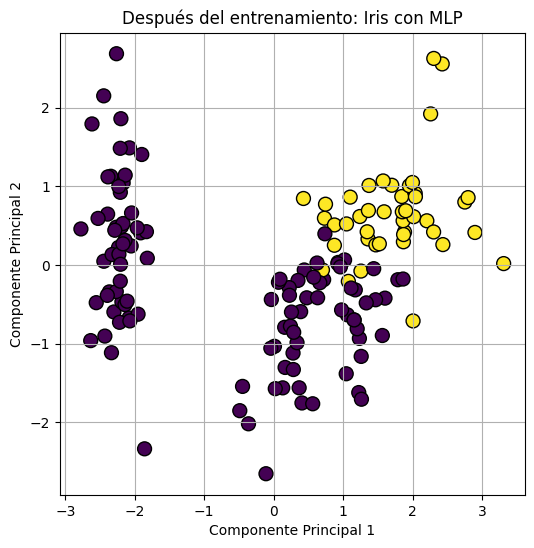

In [19]:
from sklearn.metrics import accuracy_score
print("Precisión del MLP:", accuracy_score(y, y_pred))
# Proyectar predicciones al espacio 2D
X_pred_2d = pca.transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_pred_2d[:, 0], X_pred_2d[:, 1], c=y_pred, cmap='viridis', s=100, edgecolors='k')
plt.title("Después del entrenamiento: Iris con MLP")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


Activar early_stopping en datasets pequeños puede provocar que el entrenamiento se detenga antes de que el modelo haya aprendido correctamente. En este caso, vimos cómo la red se quedó en el 53% de validación y terminó con baja precisión. Al desactivar esa opción y ajustar el modelo, recuperamos un rendimiento óptimo